In [1]:
%matplotlib inline

In [2]:
import pathlib

In [3]:
import numpy as np

In [4]:
import pandas as pd

### read the dataset that seems to contains the fish weights 

In [5]:
fish_weights = pd.read_csv('../data/age_kah2001_t_fish.csv')

In [6]:
fish_weights.columns

Index(['origin', '    yr', 'trip_code', '  sample_no', 'sub_sample_no',
       'area ', 'species', '    fish_no', '  lgth', 'lgth_code', 'sex',
       'gonad_stage', '     weight', 'otolith_weight', 'otolith_weight2',
       'otolith_lgth', 'otolith_width', 'material1', 'material2',
       'fish_select_meth', 'proj_code   ', 'collection_date', 'comments'],
      dtype='object')

### remove the spaces in the columns 

In [7]:
fish_weights.columns = fish_weights.columns.str.strip(' ')

### a good idea is to check the data type of each column 

In [8]:
fish_weights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 23 columns):
origin              1040 non-null object
yr                  1040 non-null int64
trip_code           1040 non-null object
sample_no           1040 non-null int64
sub_sample_no       1040 non-null int64
area                1040 non-null object
species             1040 non-null object
fish_no             1040 non-null int64
lgth                1040 non-null float64
lgth_code           1040 non-null object
sex                 1040 non-null int64
gonad_stage         846 non-null float64
weight              1030 non-null float64
otolith_weight      0 non-null float64
otolith_weight2     0 non-null float64
otolith_lgth        0 non-null float64
otolith_width       0 non-null float64
material1           1040 non-null int64
material2           0 non-null float64
fish_select_meth    1040 non-null int64
proj_code           1040 non-null object
collection_date     1040 non-null object
commen

In [9]:
fish_weights.species.unique()

array(['SNA'], dtype=object)

In [10]:
fish_weights.sex.unique()

array([2, 3, 1], dtype=int64)

### from the description on page 20 of `age.pdf`, the codes are `1=Male, 2=Female, 3=immature`

### we can quickly get a summary 

In [11]:
fish_weights.groupby(fish_weights.sex)[['weight']].describe()

weight                                                            
     count        mean         std   min    25%    50%     75%     max
sex                                                                   
1    390.0  758.115385  447.932089  90.0  452.5  658.0   997.5  3768.0
2    509.0  809.970530  577.391270  62.0  444.0  702.0  1002.0  4448.0
3    131.0   82.610687  198.426912  12.0   22.0   40.0    74.0  1694.0

In [12]:
fish_weights.groupby(fish_weights.sex)[['weight']].quantile(0.2)

0.2,weight
sex,
1,423.2
2,398.0
3,20.0


In [13]:
fish_weights.groupby(fish_weights.sex)[['weight']].describe(percentiles=np.arange(0.1,1,0.1))

weight                                                                   \
     count        mean         std   min    10%    20%  30.0%    40%    50%   
sex                                                                           
1    390.0  758.115385  447.932089  90.0  311.4  423.2  481.4  556.0  658.0   
2    509.0  809.970530  577.391270  62.0  245.6  398.0  496.0  594.2  702.0   
3    131.0   82.610687  198.426912  12.0   16.0   20.0   26.0   32.0   40.0   

                                           
       60%    70%     80%     90%     max  
sex                                        
1    762.0  900.0  1088.8  1318.6  3768.0  
2    815.6  913.2  1096.0  1364.4  4448.0  
3     48.0   62.0    80.0   118.0  1694.0

In [14]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


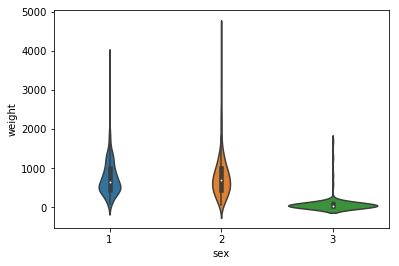

In [15]:
sns.violinplot(data=fish_weights, x="sex", y="weight")

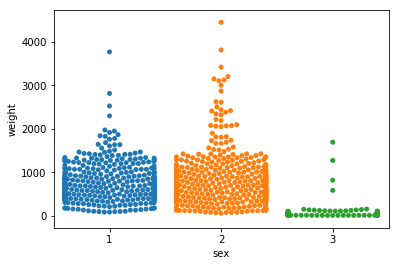

In [16]:
ax = sns.swarmplot(data=fish_weights, x="sex", y="weight") 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

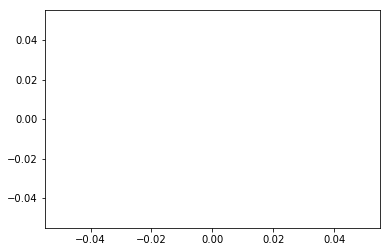

In [17]:
ax = sns.distplot(fish_weights.query("sex == 1")['weight'])
ax.set_xlim(0, None);
ax.set_title('fish weight for males');